In [1]:
import daft

# todo

GMM
DP - done
HDP - done
HMM
B-HMM
S-HDP-HMM - done

# Dirichlet process

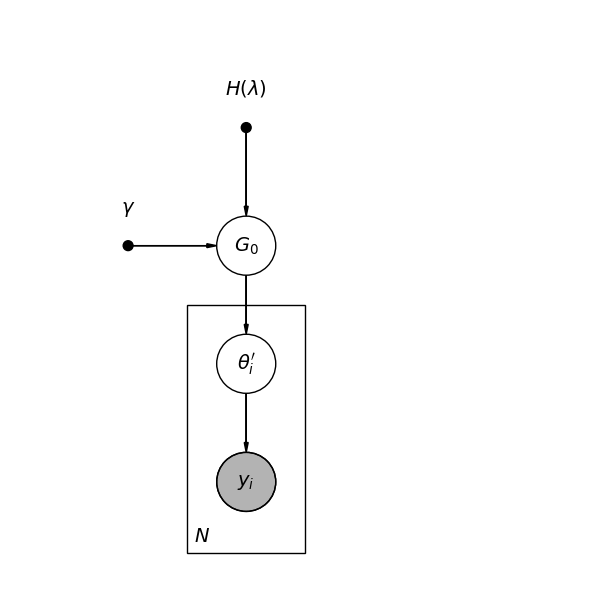

In [142]:
font_size = 14

pgm = daft.PGM(grid_unit=3, node_unit=1.5, aspect=1, shape=[5,5])

# Hyperparameters
pgm.add_node("gamma", r"$\gamma$", 1, 3, fixed=True, fontsize=font_size)
pgm.add_node("H", r"$H(\lambda)$", 2, 4, fixed=True, fontsize=font_size)
pgm.add_node("G0", r"$G_0$", 2, 3, fontsize=font_size)
pgm.add_node("theta_prime", r"$\theta_i'$", 2, 2, fontsize=font_size)
pgm.add_node("y", r"$y_i$", 2, 1, observed=True, fontsize=font_size)


# Base distribution G0
pgm.add_edge("gamma", "G0")
pgm.add_edge("H", "G0")
pgm.add_edge("G0", "theta_prime")
pgm.add_edge("theta_prime", "y")

# And a plate.
pgm.add_plate([1.5, 0.5, 1, 2], label=r"$N$", shift=-0.1, fontsize=font_size)
# Observations
# Render and show the figure
pgm.render()
pgm.savefig('dirichlet-process-a.svg')
pgm.show()

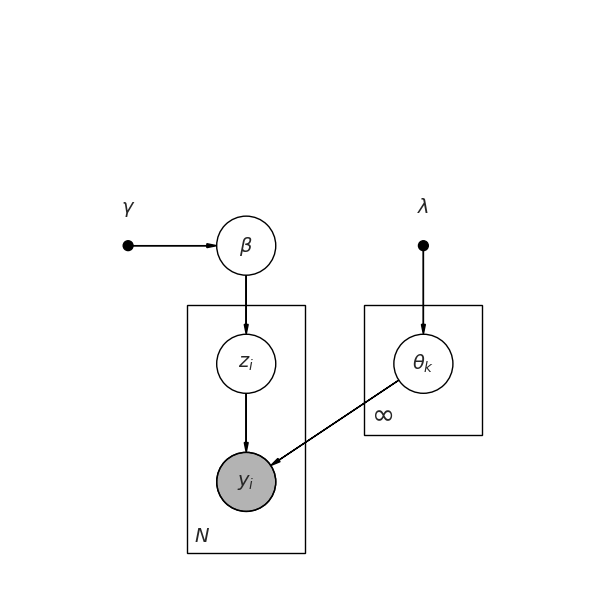

In [2]:
font_size = 14

pgm = daft.PGM(grid_unit=3, node_unit=1.5, aspect=1, shape=[5,5])

# Hyperparameters
pgm.add_node("gamma", r"$\gamma$", 1, 3, fixed=True, fontsize=font_size)
pgm.add_node("lambda", r"$\lambda$", 3.5, 3, fixed=True, fontsize=font_size)
pgm.add_node("theta", r"$\theta_k$", 3.5, 2, fontsize=font_size)
pgm.add_node("beta", r"$\beta$", 2, 3, fontsize=font_size)
pgm.add_node("z", r"$z_i$", 2, 2, fontsize=font_size)
pgm.add_node("y", r"$y_i$", 2, 1, observed=True, fontsize=font_size)


# Base distribution G0
pgm.add_edge("gamma", "beta")
pgm.add_edge("lambda", "theta")
pgm.add_edge("theta", "y")
pgm.add_edge("beta", "z")
pgm.add_edge("z", "y")

# And a plate.
pgm.add_plate([1.5, 0.5, 1, 2], label=r"$N$", shift=-0.1, fontsize=font_size)
pgm.add_plate([3, 1.5, 1, 1], label=r"$\infty$", shift=-0.1, fontsize=font_size+6)
# Observations
# Render and show the figure
pgm.render()
pgm.savefig('dirichlet-process-b.svg')
pgm.show()

# Hierarchical Dirichlet Process

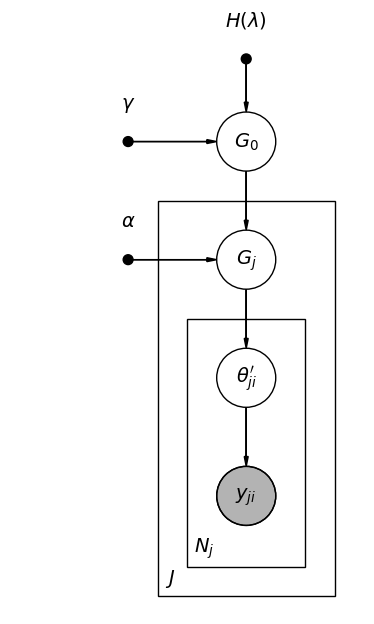

In [15]:
font_size = 14

w = 3
h = 5

pgm = daft.PGM(grid_unit=3, node_unit=1.5, aspect=1, shape=[w,h])

# Hyperparameters
pgm.add_node("H", r"$H(\lambda)$", 2, 4.7, fixed=True, fontsize=font_size)

pgm.add_node("alpha", r"$\alpha$", 1, 3, fixed=True, fontsize=font_size)
pgm.add_node("gamma", r"$\gamma$", 1, 4, fixed=True, fontsize=font_size)

pgm.add_node("G0", r"$G_0$", 2, 4, fontsize=font_size)
pgm.add_node("Gj", r"$G_j$", 2, 3, fontsize=font_size)

pgm.add_node("theta_prime", r"$\theta_{ji}'$", 2, 2, fontsize=font_size)
pgm.add_node("y", r"$y_{ji}$", 2, 1, observed=True, fontsize=font_size)

# pgm.add_node("x0", r"$x$", 0, 0)
# pgm.add_node("x1", r"$x$", w, h)


# Base distribution G0
pgm.add_edge("H", "G0")
pgm.add_edge("gamma", "G0")
pgm.add_edge("G0", "Gj")
pgm.add_edge("alpha", "Gj")
pgm.add_edge("Gj", "theta_prime")
pgm.add_edge("theta_prime", "y")

# And a plate.
pgm.add_plate([1.5, 0.5, 1, 2], label=r"$N_j$", shift=-0.1, fontsize=font_size, rect_params={'joinstyle': 'miter'})
pgm.add_plate([1.25, 0.25, 1.5, 3.25], label=r"$J$", shift=-0.1, fontsize=font_size)
# Observations
# Render and show the figure
pgm.render()
pgm.savefig('hierarchical-dirichlet-process-a.pdf')
pgm.show()

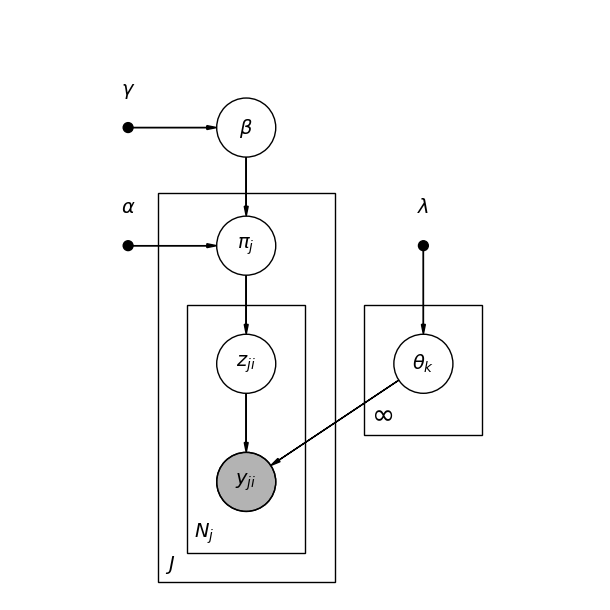

In [16]:
font_size = 14

pgm = daft.PGM(grid_unit=3, node_unit=1.5, aspect=1, shape=[5,5])

# Hyperparameters
pgm.add_node("gamma", r"$\gamma$", 1, 4, fixed=True, fontsize=font_size)
pgm.add_node("beta", r"$\beta$", 2, 4, fontsize=font_size)

pgm.add_node("alpha", r"$\alpha$", 1, 3, fixed=True, fontsize=font_size)
pgm.add_node("pie", r"$\pi_j$", 2, 3, fontsize=font_size)

pgm.add_node("lambda", r"$\lambda$", 3.5, 3, fixed=True, fontsize=font_size)
pgm.add_node("theta", r"$\theta_k$", 3.5, 2, fontsize=font_size)


pgm.add_node("z", r"$z_{ji}$", 2, 2, fontsize=font_size)
pgm.add_node("y", r"$y_{ji}$", 2, 1, observed=True, fontsize=font_size)


# Base distribution G0
pgm.add_edge("gamma", "beta")
pgm.add_edge("alpha", "pie")

pgm.add_edge("lambda", "theta")
pgm.add_edge("theta", "y")

pgm.add_edge("beta", "pie")
pgm.add_edge("pie", "z")
pgm.add_edge("z", "y")

# And a plate.
pgm.add_plate([1.5, 0.5, 1, 2], label=r"$N_j$", shift=-0.1, fontsize=font_size)
pgm.add_plate([1.25, 0.25, 1.5, 3.2], label=r"$J$", shift=-0.1, fontsize=font_size)
pgm.add_plate([3, 1.5, 1, 1], label=r"$\infty$", shift=-0.1, fontsize=font_size+6)
# Observations
# Render and show the figure
pgm.render()
pgm.savefig('hierarchical-dirichlet-process-b.pdf')
pgm.show()

Sticky HDP-HMM

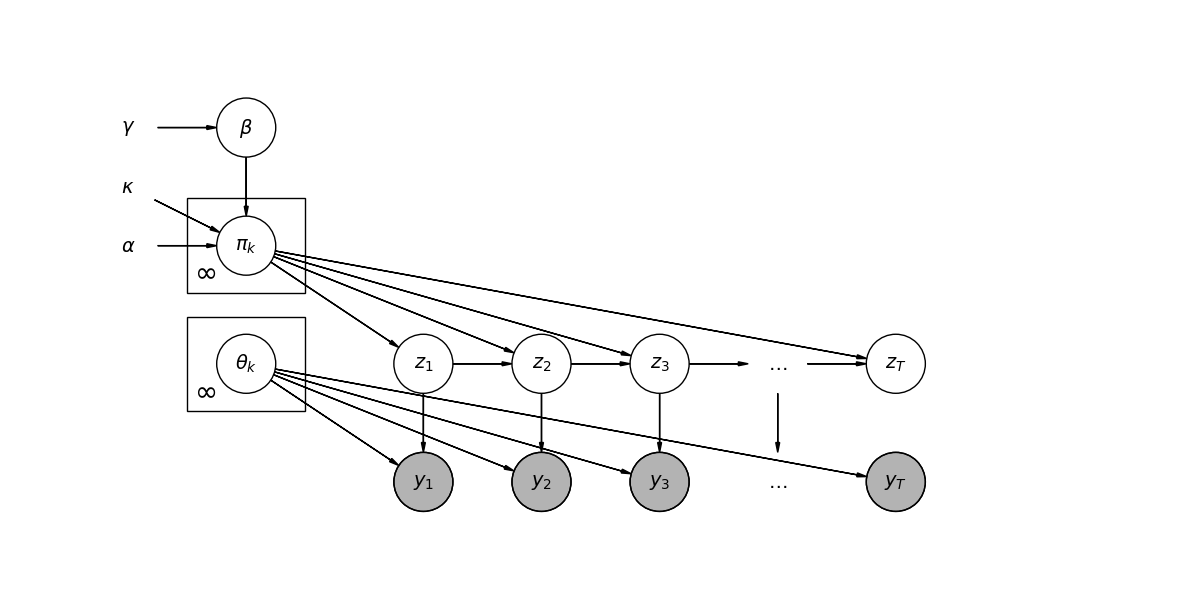

In [3]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt

font_size = 14
no_outline = {'ec': 'None'}
pgm = daft.PGM(grid_unit=3, node_unit=1.5, aspect=1, shape=[10,5])

# Hyperparameters
pgm.add_node("gamma", r"$\gamma$", 1, 4, fontsize=font_size, plot_params=no_outline)
pgm.add_node("beta", r"$\beta$", 2, 4, fontsize=font_size)

pgm.add_node("alpha", r"$\alpha$", 1, 3, fontsize=font_size, plot_params=no_outline)
pgm.add_node("kappa", r"$\kappa$", 1, 3.5, fontsize=font_size, plot_params=no_outline)
pgm.add_node("pie", r"$\pi_k$", 2, 3, fontsize=font_size)


# pgm.add_node("lambda", r"$\lambda$", 3.5, 3, fixed=True, fontsize=font_size)
pgm.add_node("theta", r"$\theta_k$", 2, 2, fontsize=font_size)

pgm.add_node("z1", r"$z_{1}$", 3.5, 2, fontsize=font_size)
pgm.add_node("z2", r"$z_{2}$", 4.5, 2, fontsize=font_size)
pgm.add_node("z3", r"$z_{3}$", 5.5, 2, fontsize=font_size)
pgm.add_node("z4", r"$\ldots$", 6.5, 2, fontsize=font_size, plot_params={'ec': 'None'})
pgm.add_node("z5", r"$z_{T}$", 7.5, 2, fontsize=font_size)

# pgm.add_node("z", r"$z_{ji}$", 2, 2, fontsize=font_size)
pgm.add_node("y1", r"$y_{1}$", 3.5, 1, observed=True, fontsize=font_size)
pgm.add_node("y2", r"$y_{2}$", 4.5, 1, observed=True, fontsize=font_size)
pgm.add_node("y3", r"$y_{3}$", 5.5, 1, observed=True, fontsize=font_size)
pgm.add_node("y4", r"$\ldots$", 6.5, 1, observed=False, fontsize=font_size, plot_params={'ec': 'None'})
pgm.add_node("y5", r"$y_{T}$", 7.5, 1, observed=True, fontsize=font_size)

pgm.add_edge("beta", "pie")

# Base distribution G0
pgm.add_edge("theta", "y1")
pgm.add_edge("theta", "y2")
pgm.add_edge("theta", "y3")
pgm.add_edge("theta", "y5")

# pgm.add_edge("y3", y_dot)

pgm.add_edge("pie", "z1")
pgm.add_edge("pie", "z2")
pgm.add_edge("pie", "z3")
pgm.add_edge("pie", "z5")
# pgm.add_edge("alpha", "pie")
#
pgm.add_edge("z1", "z2")
pgm.add_edge("z2", "z3")
pgm.add_edge("z3", "z4")
pgm.add_edge("z4", "z5")

pgm.add_edge("z1", "y1")
pgm.add_edge("z2", "y2")
pgm.add_edge("z3", "y3")
pgm.add_edge("z4", "y4")

# pgm.add_edge("theta", "y")
#
pgm.add_edge("gamma", "beta")
pgm.add_edge("alpha", "pie")
pgm.add_edge("kappa", "pie")
# pgm.add_edge("pie", "z")
# pgm.add_edge("z", "y")

# Create a custom arrow that goes away from the node


# Add the arrow and label to the PGM

# And a plate.
pgm.add_plate([1.5, 2.7, 1, 0.7], label=r"$\infty$", shift=-0.1, fontsize=font_size+6)
pgm.add_plate([1.5, 1.7, 1, 0.7], label=r"$\infty$", shift=-0.1, fontsize=font_size+6)

pgm.render()
pgm.show()

In [81]:
pgm_test = pgm._nodes